# Analyse exploratoire

# Import des modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
plt.rcParams['figure.facecolor']='w'
import io
import simplejson as json
import warnings
warnings.filterwarnings('ignore')
import ppscore as pps
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import *
from sklearn import metrics

# Récupération des données

In [2]:
data = pd.read_csv("2016_Building_Energy_Benchmarking (4).csv", sep=',')


# Objectif:

Comprendre les données dont on dispose pour définir une stratégie de modélisation.


  **Identification de la target :**

   **prédire les émissions de CO2 :**

   **TotalGHGEmissions:**La quantité totale d'émission de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et l'oxyde nitreux, rejetée dans l'atmosphère à la suite de la consommation d'énergie sur le site, mesurée en tonne.
                
   **prédire la consommation totale d’énergie de bâtiments :**
                
   **SiteEnergyUsewN(kBtu):**La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.
   
   




**Unité utilisée :** 

kBtu --> Kilo British Thermal Units / Kilo d'unités thermiques britanniques


**Types de variables :** 22 quantitatives, 24 qualitatives.

# Premier aperçu

In [3]:
data.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3221,"49802,2016,NonResidential,Hotel,Hotel Ballard,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,"21330,2016,Multifamily MR (5-9),Mid-Rise Multi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,"20766,2016,Multifamily MR (5-9),Mid-Rise Multi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,"24895,2016,NonResidential,Supermarket / Grocer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2201,24765,2016.0,Multifamily LR (1-4),Low-Rise Multifamily,La Romarr Apartments,10014 5th AVE NE,Seattle,WA,98125.0,3226049298,...,194226.5938,662701.0,0.0,0.0,False,NaN,Compliant,NaN,4.62,0.23


In [4]:
data.shape

(3376, 46)

In [5]:
data.dtypes

OSEBuildingID                       object
DataYear                           float64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                float64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                          float64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   float64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

**Discription de chaque colonne**

In [6]:
for colonne in data.columns:
    print('\n',colonne)
    print('Qté Nan : ', round(data[colonne].isna().sum()/data[colonne].shape[0]*100), '%')
    print('Uniques : ', data[colonne].nunique())


 OSEBuildingID
Qté Nan :  0 %
Uniques :  3376

 DataYear
Qté Nan :  50 %
Uniques :  1

 BuildingType
Qté Nan :  50 %
Uniques :  8

 PrimaryPropertyType
Qté Nan :  50 %
Uniques :  24

 PropertyName
Qté Nan :  50 %
Uniques :  1668

 Address
Qté Nan :  50 %
Uniques :  1662

 City
Qté Nan :  50 %
Uniques :  1

 State
Qté Nan :  50 %
Uniques :  1

 ZipCode
Qté Nan :  51 %
Uniques :  42

 TaxParcelIdentificationNumber
Qté Nan :  50 %
Uniques :  1625

 CouncilDistrictCode
Qté Nan :  50 %
Uniques :  7

 Neighborhood
Qté Nan :  50 %
Uniques :  19

 Latitude
Qté Nan :  50 %
Uniques :  1535

 Longitude
Qté Nan :  50 %
Uniques :  1482

 YearBuilt
Qté Nan :  50 %
Uniques :  112

 NumberofBuildings
Qté Nan :  51 %
Uniques :  15

 NumberofFloors
Qté Nan :  50 %
Uniques :  31

 PropertyGFATotal
Qté Nan :  50 %
Uniques :  1596

 PropertyGFAParking
Qté Nan :  50 %
Uniques :  108

 PropertyGFABuilding(s)
Qté Nan :  50 %
Uniques :  1599

 ListOfAllPropertyUseTypes
Qté Nan :  51 %
Uniques :  47

 LargestP

In [7]:
data.describe(include='all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376,1672.0,1672,1672,1672,1672,1672,1672,1663.000000,1672,...,1.663000e+03,1.663000e+03,1.663000e+03,1.663000e+03,1672,0.0,1672,18,1663.00000,1663.000000
unique,3376,NaN,8,24,1668,1662,1,1,NaN,1625,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,1,NaN,NonResidential,Low-Rise Multifamily,Central Park,2600 SW Barton St,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,1,NaN,652,592,2,4,1672,1672,NaN,7,...,NaN,NaN,NaN,NaN,1572,NaN,1535,15,NaN,NaN
mean,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98118.521347,NaN,...,7.580203e+05,2.586365e+06,1.117192e+04,1.117192e+06,NaN,NaN,NaN,NaN,94.75006,1.152135
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20.058503,NaN,...,4.969801e+06,1.695696e+07,4.405388e+04,4.405388e+06,NaN,NaN,NaN,NaN,418.84197,1.581131
min,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98012.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.80000,-0.020000
25%,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.583752e+05,5.403760e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,7.49000,0.200000
50%,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,2.670775e+05,9.112680e+05,2.853580e+03,2.853580e+05,NaN,NaN,NaN,NaN,26.46000,0.640000
75%,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98125.000000,NaN,...,5.388124e+05,1.838428e+06,1.033188e+04,1.033188e+06,NaN,NaN,NaN,NaN,70.84000,1.470000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   object 
 1   DataYear                         1672 non-null   float64
 2   BuildingType                     1672 non-null   object 
 3   PrimaryPropertyType              1672 non-null   object 
 4   PropertyName                     1672 non-null   object 
 5   Address                          1672 non-null   object 
 6   City                             1672 non-null   object 
 7   State                            1672 non-null   object 
 8   ZipCode                          1663 non-null   float64
 9   TaxParcelIdentificationNumber    1672 non-null   object 
 10  CouncilDistrictCode              1672 non-null   float64
 11  Neighborhood                     1672 non-null   object 
 12  Latitude            

**Existe-t-il des Doublons dans ce jeu de données ?**

In [9]:
data.duplicated().sum()

0

**Nombre de valeurs manquantes pour chaque colonne**

In [10]:
data.isnull().sum() / data.shape[0] * 100.00

OSEBuildingID                        0.000000
DataYear                            50.473934
BuildingType                        50.473934
PrimaryPropertyType                 50.473934
PropertyName                        50.473934
Address                             50.473934
City                                50.473934
State                               50.473934
ZipCode                             50.740521
TaxParcelIdentificationNumber       50.473934
CouncilDistrictCode                 50.473934
Neighborhood                        50.473934
Latitude                            50.473934
Longitude                           50.473934
YearBuilt                           50.473934
NumberofBuildings                   50.710900
NumberofFloors                      50.473934
PropertyGFATotal                    50.473934
PropertyGFAParking                  50.473934
PropertyGFABuilding(s)              50.473934
ListOfAllPropertyUseTypes           50.740521
LargestPropertyUseType            

**Proportion de NAN**

<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

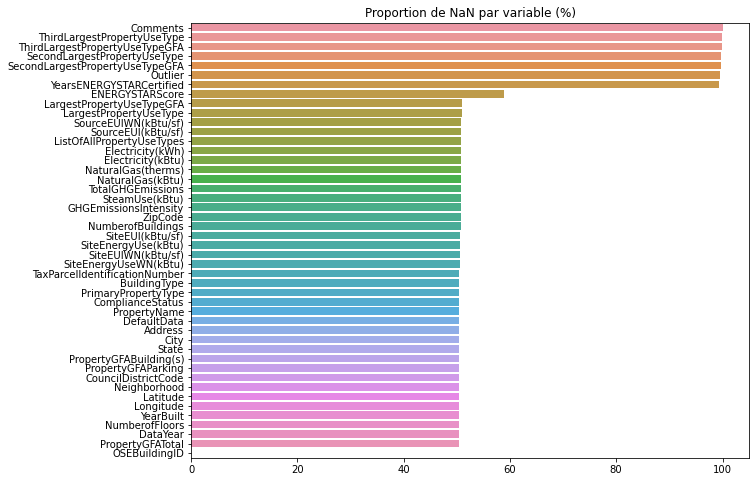

In [11]:
data_nan = data.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=data_nan.values/data.shape[0]*100, y=data_nan.index)

# Nettoyage des données

**Filtrage avec la variable ComplianceStatus qui représente la conformité des données relevées**

In [12]:
data['ComplianceStatus'].unique()

array(['Compliant', nan, 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [13]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(data[data['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 1841.


In [14]:
data = data[data['ComplianceStatus'] == "Compliant"]

In [15]:
print("shape after: ", data.shape)

shape after:  (1535, 46)


**Filtrage avec la variable Outlier**

La variable identifiant les outliers est interessante, nous ne savons pas rééllement à quoi correspondent ces outliers. Nous allons donc supprimer les lignes mentionnant ces outliers.

In [16]:
data = data[~data["Outlier"].isnull()==False]

In [17]:
print("shape after: ", data.shape)

shape after:  (1535, 46)


**Filtrage des données(Hors logement résidentiel)**

Nous souhaitons conserver uniquement les batiments non résidentielles.

In [18]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

**SPS-District K-12** = Seattle public school District

Nous excluons Multifamilial MR (5-9)', Multifamilial LR (1-4)', 'Multifamilial HR (10+)'

In [19]:
print("shape before: ", data.shape)
data = data[data['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 
       'SPS-District K-12', 'Campus', 'Nonresidential WA'])]
print("shape after: ", data.shape)

shape before:  (1535, 46)
shape after:  (691, 46)


**Vérification de la cohérence des 'Sous-colonnes Énergie' vs. 'SiteEnergyUse'**

D'abord, nous supprimons les lignes où 'SiteEnergyUse(kBtu)' est égal à 0.

In [20]:
data = data.dropna(subset=['SiteEnergyUse(kBtu)'])
data = data.drop(index=data[data['SiteEnergyUseWN(kBtu)']==0].index)
print("shape after: ", data.shape)

shape after:  (685, 46)


Nous vérifions que la colonne 'SiteEnergyUse(kBtu)' est la somme des colonnes d'énergie en (kBtu)

In [21]:
sub_energy_cols = ['SteamUse(kBtu)','Electricity(kBtu)',
                   'NaturalGas(kBtu)']
data['SiteEnergyUse(kBtu)_calc'] = data[sub_energy_cols].sum(axis='columns')
m_en_out = ~data['SiteEnergyUse(kBtu)_calc'].between(data['SiteEnergyUse(kBtu)']*0.9,
                                                  data['SiteEnergyUse(kBtu)']*1.1)
print("Lignes où l'énergie totale n'est pas\n \
comprise dans la plage  [90%-110%] de 'SiteEnergyUse(kBtu)': ",
data[m_en_out].shape[0], '/', data.shape[0])

Lignes où l'énergie totale n'est pas
 comprise dans la plage  [90%-110%] de 'SiteEnergyUse(kBtu)':  6 / 685


Nous supprimons les lignes lorsque 'SiteEnergyUse(kBtu)' n'est pas compris entre 90 % et 110 % de la valeur calculée.

In [22]:
data = data.drop(index=data[m_en_out].index)
data['SiteEnergyUse(kBtu)'] = data['SiteEnergyUse(kBtu)_calc']
del data['SiteEnergyUse(kBtu)_calc']
print("shape after: ", data.shape)

shape after:  (679, 46)


**Vérification de la cohérence des « sous-colonnes GFA » par rapport à « PropertyGFATotal »**

In [23]:
print("shape after: ", data.shape)

shape after:  (679, 46)


Vérifier que la colonne 'PropertyGFATotal' est la somme des sous-colonnes GFA.
   
   -Surface de stationnement et surface d'usage

In [24]:
sub_GFA_cols1 = ['PropertyGFAParking', 'PropertyGFABuilding(s)']

In [25]:
print("shape after: ", data.shape)

shape after:  (679, 46)


In [26]:
data['PropertyGFATotal_calc'] = data[sub_GFA_cols1].sum(axis='columns')
m_GFA_out = ~data['PropertyGFATotal_calc'].between(data['PropertyGFATotal']*0.99,
                                                  data['PropertyGFATotal']*1.01)
print("Lignes où la GFA totale n'est pas\n \
dans la  plage [99%-101%] du 'PropertyGFATotal' :",
data[m_GFA_out].shape[0], '/', data.shape[0])

Lignes où la GFA totale n'est pas
 dans la  plage [99%-101%] du 'PropertyGFATotal' : 0 / 679


In [27]:
print("shape after: ", data.shape)

shape after:  (679, 47)


La GFA totale est très précisément la somme de la surface de stationnement et de la surface de construction.

**Nous conservons que les lignes où les données cibles sont différentes de 0**

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUseWN(kBtu)) et ses émissions de CO2 (TotalGHGEmissions). Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [28]:
(data['TotalGHGEmissions']==0).sum()

0

In [29]:
(data['SiteEnergyUseWN(kBtu)']==0).sum()

0

In [30]:
print("shape after: ", data.shape)

shape after:  (679, 47)


**Suppression de lignes où le nombre de bâtiments = 0**

In [31]:
data = data[data['NumberofBuildings']!=0]

In [32]:
data.shape

(658, 47)

**Nous allons éliminer certaines variables qui ne seront pas utiles pour nos modélisations.**

-Nous avons différentes unités:

**kWh** : kilowattheure
    
**Therm** : correspond approximativement à l'énergie libérée par la combustion de 2 kg (approx. 3 l) de gas.
    
**kBtu** : British thermal unit

Nous choississons de travailler avec le **kBtu.**

-Certaines variables sont redondantes

In [33]:
data = data.loc[:, ['BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude', 'YearBuilt', 
                    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 
                    'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
                    'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
                    'NaturalGas(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore']]

In [34]:
data.shape

(658, 18)

**Observation des outlier**

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,658.0,4.761717e+01,5.221171e-02,47.50959,4.757769e+01,4.761392e+01,4.765783e+01,4.773368e+01
Longitude,658.0,-1.223324e+02,2.492359e-02,-122.41182,-1.223436e+02,-1.223323e+02,-1.223209e+02,-1.222618e+02
YearBuilt,658.0,1.958889e+03,3.062532e+01,1900.00000,1.930000e+03,1.961000e+03,1.982000e+03,2.015000e+03
NumberofBuildings,658.0,1.200608e+00,1.568099e+00,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,2.700000e+01
NumberofFloors,658.0,3.112462e+00,4.994011e+00,0.00000,1.000000e+00,2.000000e+00,3.000000e+00,9.900000e+01
PropertyGFATotal,658.0,7.345531e+04,1.038943e+05,11285.00000,2.642425e+04,4.111000e+04,7.467450e+04,1.172127e+06
PropertyGFAParking,658.0,4.170711e+03,1.994465e+04,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.065800e+05
PropertyGFABuilding(s),658.0,6.928459e+04,9.711817e+04,11285.00000,2.609925e+04,4.016600e+04,7.006900e+04,1.172127e+06
LargestPropertyUseTypeGFA,655.0,7.244967e+04,1.062485e+05,8223.00000,2.608450e+04,4.119800e+04,7.193700e+04,1.172127e+06
SiteEnergyUseWN(kBtu),658.0,5.811294e+06,1.510497e+07,79967.89844,1.093572e+06,2.062687e+06,5.056493e+06,2.577642e+08


On peut observer que certaines variables ont une valeur maximale très différée par rapport à la valeur de 75 %, nous pouvons donc dire qu’il y a des valeurs aberrantes dans l’ensemble de données.

**Supprimer les outliers**

In [36]:
import pandas as pd
import numpy as np

# Sélectionner uniquement les colonnes numériques
data_numerique = data.select_dtypes(include=[np.number])

# Calculer les quartiles
Q1 = data_numerique.quantile(0.25)
Q3 = data_numerique.quantile(0.75)

# Calculer la plage interquartile (IQR)
IQR = Q3 - Q1

# Définir les limites supérieure et inférieure pour les colonnes numériques
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

# Copier le data frame original
data = data.copy()

# Supprimer les outliers uniquement dans les colonnes numériques
data[data_numerique.columns] = data_numerique[(data_numerique >= seuil_inferieur) & (data_numerique <= seuil_superieur)]

# Afficher le data frame avec les outliers supprimés uniquement dans les colonnes numériques
print(data)


            BuildingType PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
0         NonResidential               Hotel  47.61220 -122.33799     1927.0   
2         NonResidential               Hotel  47.61393 -122.33810     1969.0   
3         NonResidential               Hotel  47.61412 -122.33664     1926.0   
5     Nonresidential COS               Other  47.61623 -122.33657     1999.0   
6         NonResidential               Hotel  47.61390 -122.33283     1926.0   
...                  ...                 ...       ...        ...        ...   
3362  Nonresidential COS               Other  47.69330 -122.37717     2010.0   
3363  Nonresidential COS               Other  47.72126 -122.29735     1949.0   
3367  Nonresidential COS               Other  47.63228 -122.31574     1912.0   
3370  Nonresidential COS               Other  47.54067 -122.37441     1982.0   
3372  Nonresidential COS               Other  47.59625 -122.32283     2004.0   

      NumberofBuildings  NumberofFloors

In [37]:
print("shape after: ", data.shape)

shape after:  (658, 18)


# Valeurs manquantes

<AxesSubplot:>

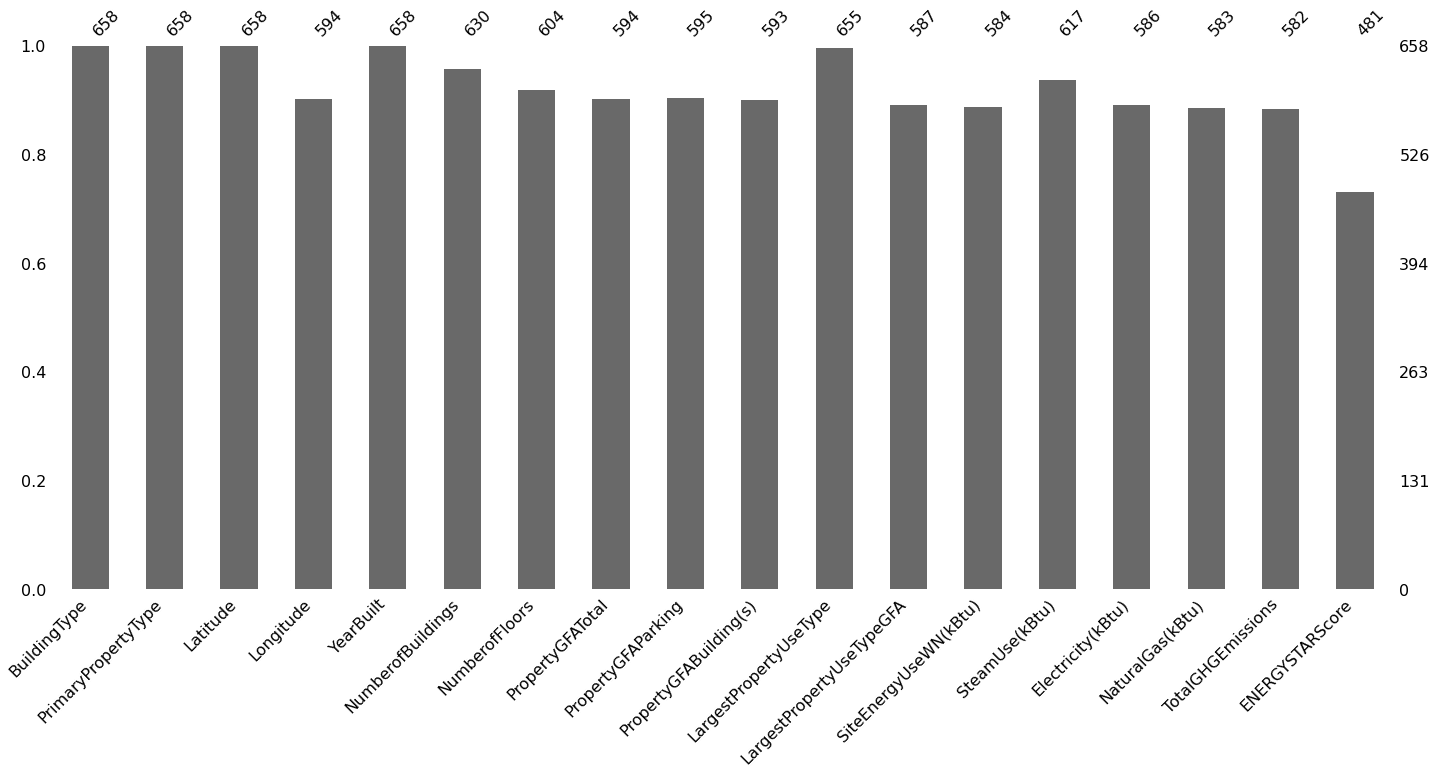

In [38]:
msno.bar(data)

In [39]:
def get_numbers_missing(df):
    nb_nan_tot = df.isna().sum().sum()
    nb_donnees_tot = np.product(df.shape)
    percent_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)
    print(f'Il y a {nb_nan_tot} de valeurs manquantes (NaN) pour un total de {nb_donnees_tot} données soit ({percent_nan_tot} %)')


def table_numbers_missing(df):
    values = df.isnull().sum()
    percentage = round(100 * (values / len(df)),2)
    
    table = pd.concat([values, percentage.round(2)], axis=1)
    table.columns = ['Nombres_de_valeurs_manquantes','Proportion_de_valeurs_manquantes_%']
    display(table[table['Nombres_de_valeurs_manquantes'] != 0]
                .sort_values('Proportion_de_valeurs_manquantes_%', ascending=False))

In [40]:
get_numbers_missing(data)

Il y a 927 de valeurs manquantes (NaN) pour un total de 11844 données soit (7.83 %)


In [41]:
table_numbers_missing(data)

,Nombres_de_valeurs_manquantes,Proportion_de_valeurs_manquantes_%
ENERGYSTARScore,177,26.90
TotalGHGEmissions,76,11.55
NaturalGas(kBtu),75,11.40
SiteEnergyUseWN(kBtu),74,11.25
Electricity(kBtu),72,10.94
LargestPropertyUseTypeGFA,71,10.79
PropertyGFABuilding(s),65,9.88
Longitude,64,9.73
PropertyGFATotal,64,9.73
PropertyGFAParking,63,9.57


In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Copier le data frame original
data = data.copy()

# Sélectionner uniquement les colonnes numériques
data_numerique = data.select_dtypes(include=[np.number])

# Créer une instance du KNNImputer avec le nombre de voisins à considérer (k)
k = 5  # Choisir un nombre approprié de voisins
imputer = KNNImputer(n_neighbors=k)

# Effectuer l'imputation en remplaçant les valeurs manquantes par les valeurs les plus proches
data[data_numerique.columns] = imputer.fit_transform(data_numerique)

# Afficher le data frame avec les valeurs manquantes remplacées par les valeurs les plus proches
print(data)

            BuildingType PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
0         NonResidential               Hotel  47.61220 -122.33799     1927.0   
2         NonResidential               Hotel  47.61393 -122.33810     1969.0   
3         NonResidential               Hotel  47.61412 -122.33664     1926.0   
5     Nonresidential COS               Other  47.61623 -122.33657     1999.0   
6         NonResidential               Hotel  47.61390 -122.33283     1926.0   
...                  ...                 ...       ...        ...        ...   
3362  Nonresidential COS               Other  47.69330 -122.37717     2010.0   
3363  Nonresidential COS               Other  47.72126 -122.29735     1949.0   
3367  Nonresidential COS               Other  47.63228 -122.31574     1912.0   
3370  Nonresidential COS               Other  47.54067 -122.37441     1982.0   
3372  Nonresidential COS               Other  47.59625 -122.32283     2004.0   

      NumberofBuildings  NumberofFloors

<AxesSubplot:>

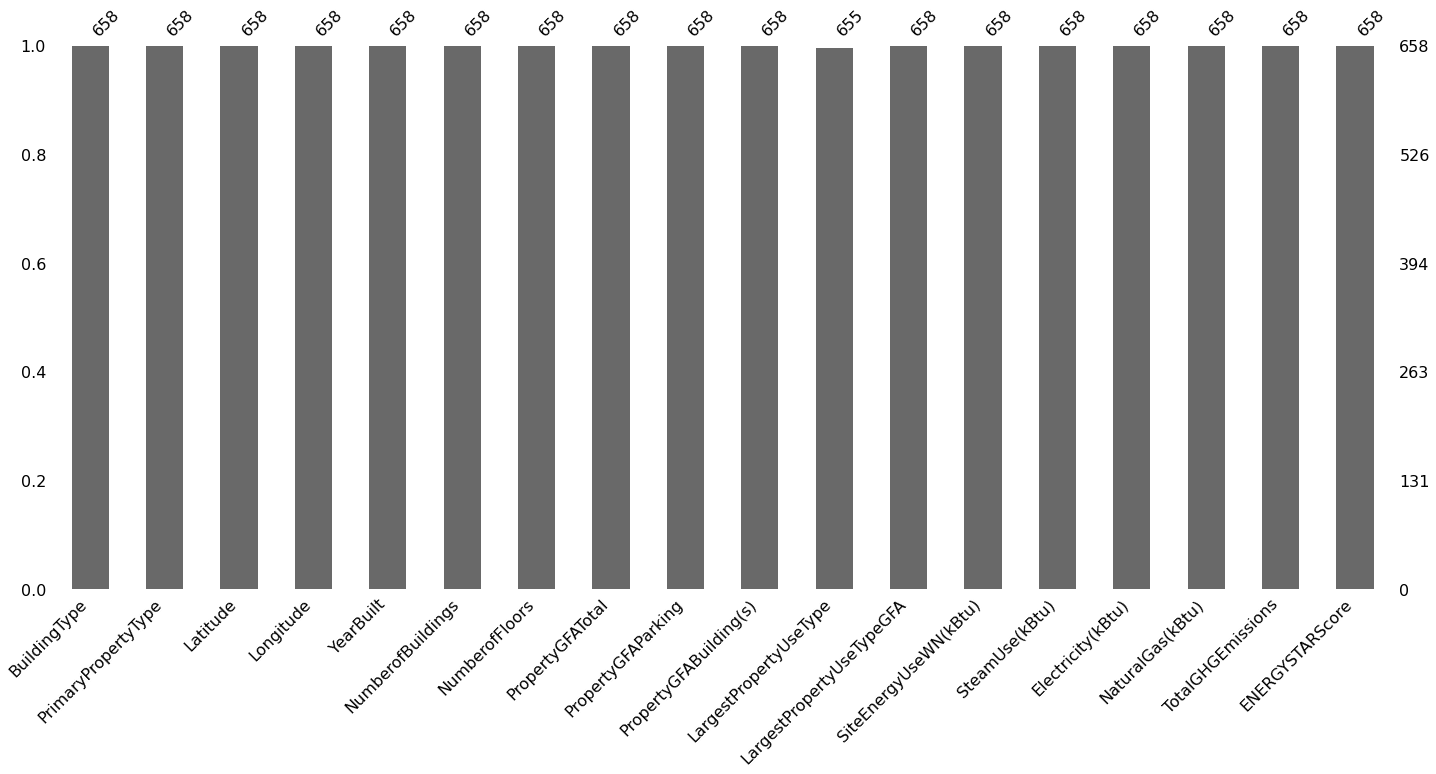

In [43]:
msno.bar(data)

In [44]:
def get_numbers_missing(df):
    nb_nan_tot = df.isna().sum().sum()
    nb_donnees_tot = np.product(df.shape)
    percent_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)
    print(f'Il y a {nb_nan_tot} de valeurs manquantes (NaN) pour un total de {nb_donnees_tot} données soit ({percent_nan_tot} %)')


def table_numbers_missing(df):
    values = df.isnull().sum()
    percentage = round(100 * (values / len(df)),2)
    
    table = pd.concat([values, percentage.round(2)], axis=1)
    table.columns = ['Nombres_de_valeurs_manquantes','Proportion_de_valeurs_manquantes_%']
    display(table[table['Nombres_de_valeurs_manquantes'] != 0]
                .sort_values('Proportion_de_valeurs_manquantes_%', ascending=False))

In [45]:
get_numbers_missing(data)

Il y a 3 de valeurs manquantes (NaN) pour un total de 11844 données soit (0.03 %)


In [46]:
table_numbers_missing(data)

,Nombres_de_valeurs_manquantes,Proportion_de_valeurs_manquantes_%
LargestPropertyUseType,3,0.46


Le plus grand usage est imputés par le premier type de propriété.

In [47]:
data[data.LargestPropertyUseType.isna()]

,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ENERGYSTARScore
1147,NonResidential,Hotel,47.61203,-122.34165,1910.0,1.0,1.0,61721.0,0.0,61721.0,NaN,62808.0,2.968430e+06,0.0,2534592.0,362488.0,36.92,93.0
2414,NonResidential,Small- and Mid-Sized Office,47.64747,-122.34086,2008.0,1.0,4.0,48350.0,0.0,48350.0,NaN,51872.0,3.280956e+06,0.0,3168131.0,0.0,22.09,45.0
2459,NonResidential,Restaurant,47.59697,-122.32474,1913.0,1.0,3.0,28800.0,0.0,28800.0,NaN,58552.0,9.358332e+05,0.0,402907.0,497017.0,29.21,34.6


In [48]:
data.LargestPropertyUseType = data.LargestPropertyUseType.fillna(data.PrimaryPropertyType)

In [49]:
get_numbers_missing(data)

Il y a 0 de valeurs manquantes (NaN) pour un total de 11844 données soit (0.0 %)


<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

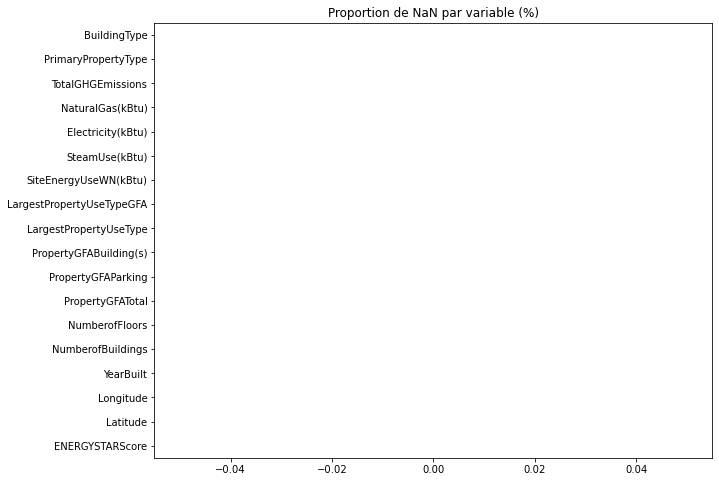

In [50]:
data_nan = data.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=data_nan.values/data.shape[0]*100, y=data_nan.index)

# Exploration

**Distribution des données**

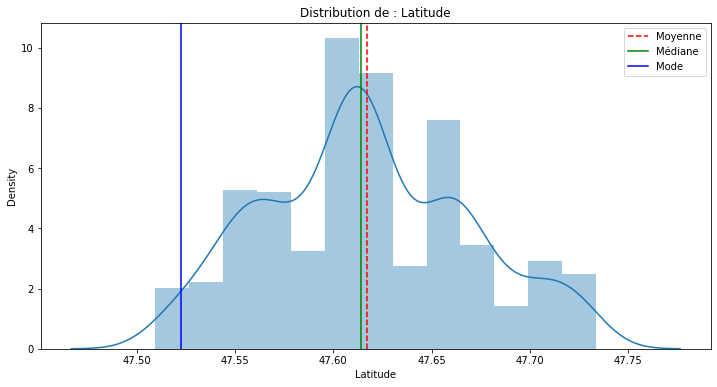

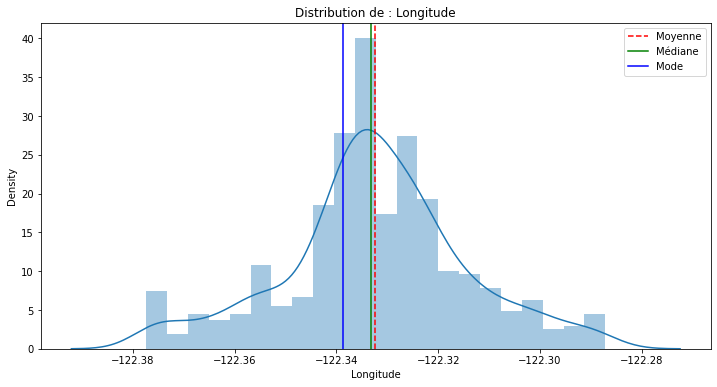

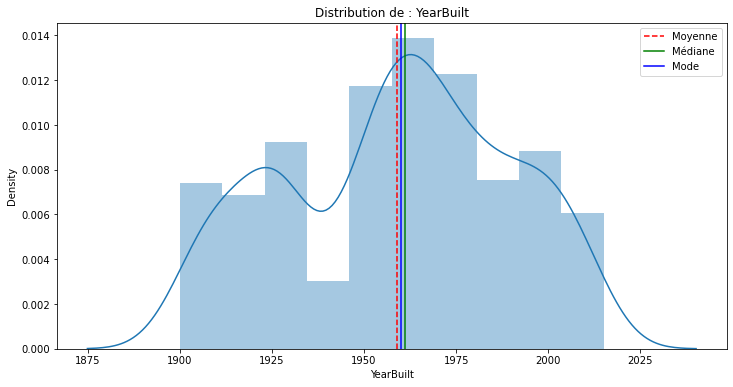

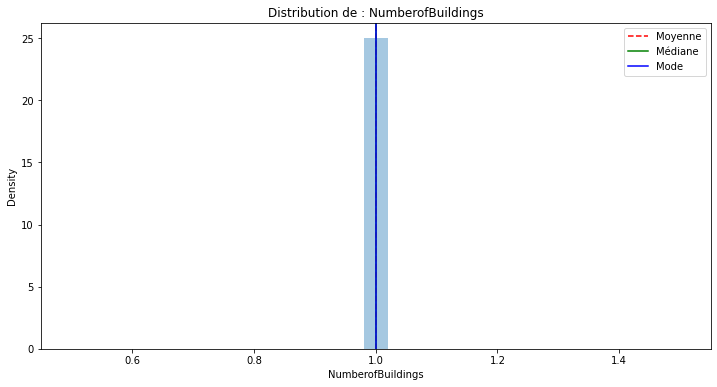

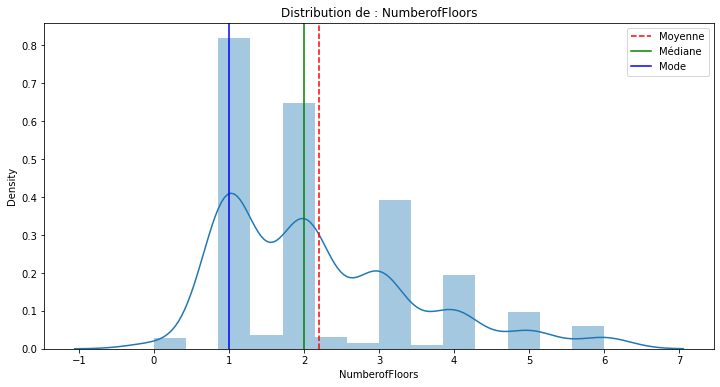

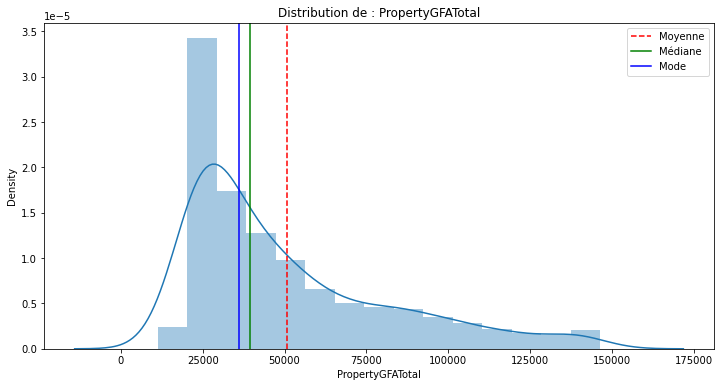

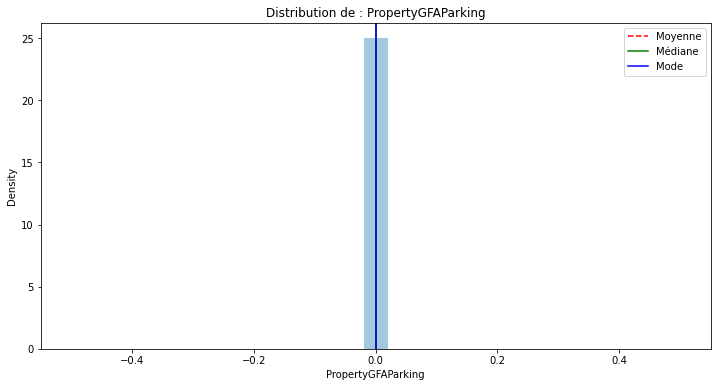

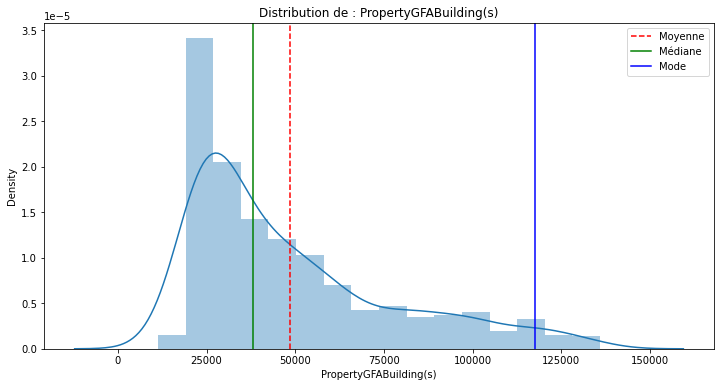

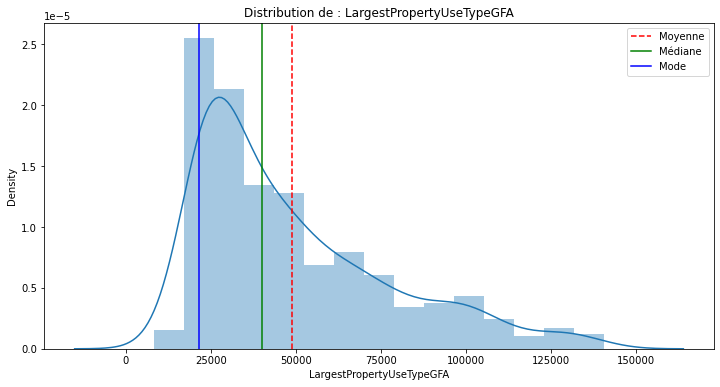

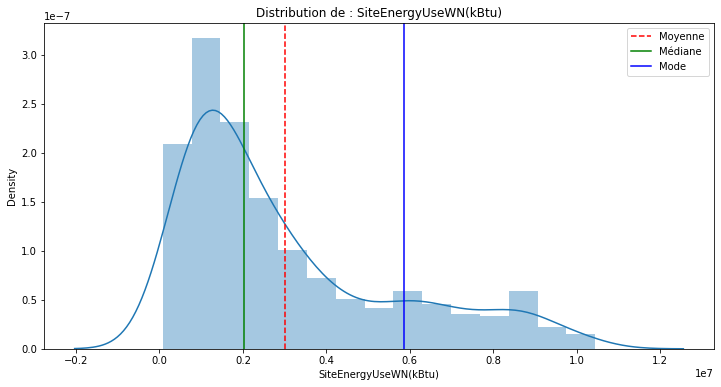

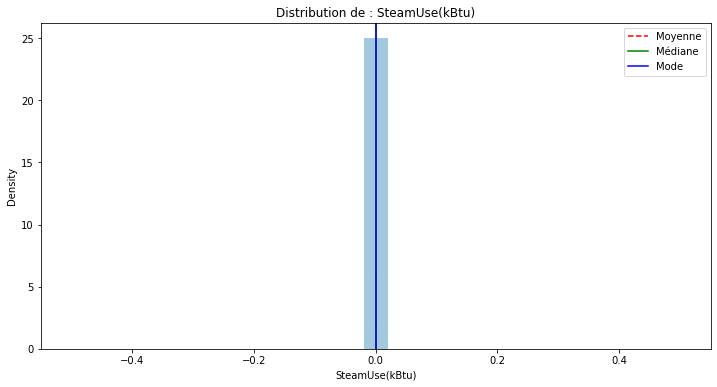

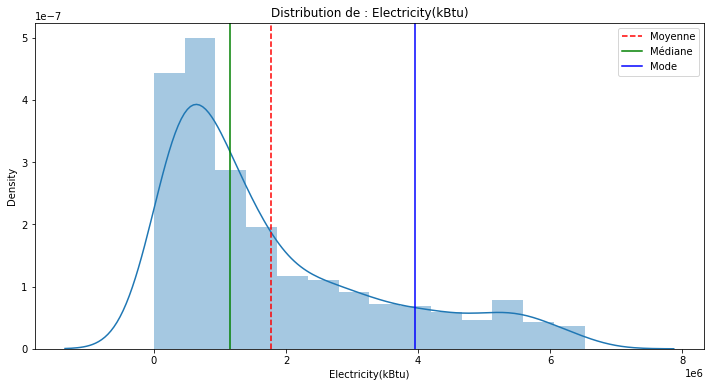

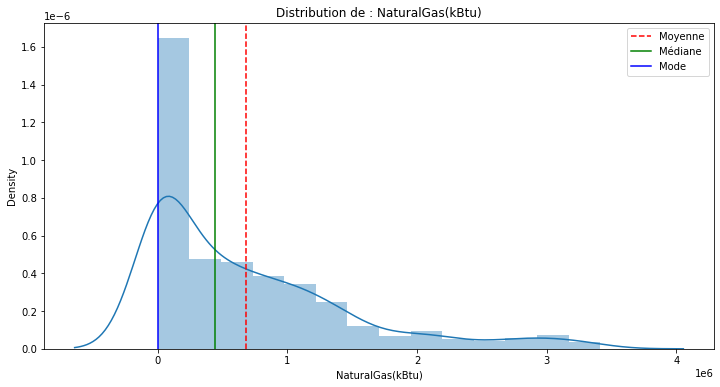

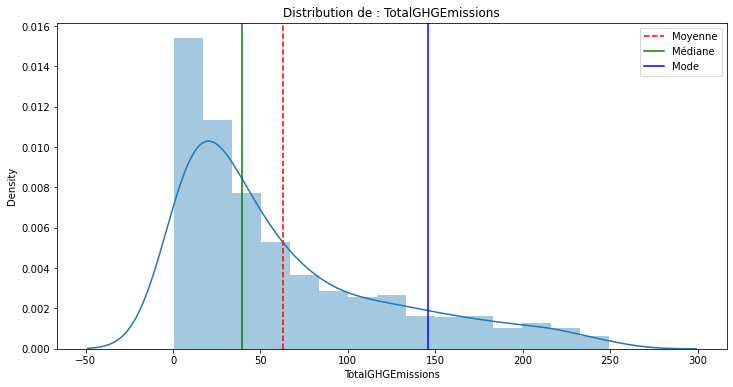

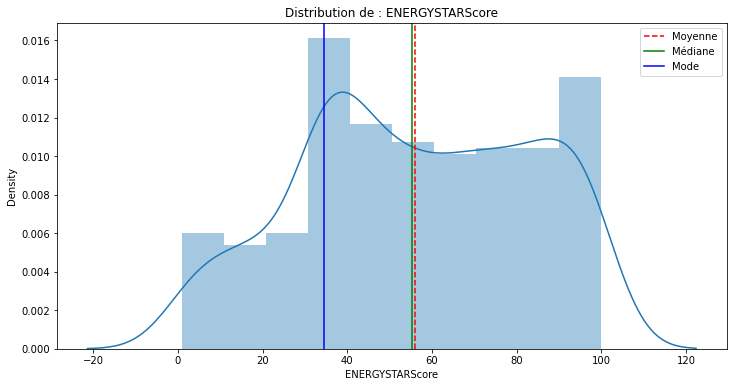

In [51]:
for col in data.select_dtypes("number"):
    plt.figure(figsize = (12,6))
    sns.distplot(data[col])
    plt.axvline(data[col].mean(), color='r', linestyle='--', label="Moyenne")
    plt.axvline(data[col].median(), color='g', linestyle='-', label="Médiane")
    plt.axvline(data[col].mode().values[0], color='b', linestyle='-', label="Mode")
    chaine = 'Distribution de : ' + col
    plt.title(chaine)
    plt.legend()
    plt.show()

In [52]:
def descriptives_stat(dataframe, liste_variables):

    liste_mean = ['moyenne']
    liste_median = ['médiane']
    liste_var = ['variance']
    liste_std = ['écart-type']
    liste_skew = ["skewness : mesure d'asymétrie"]
    liste_kurtosis = ["kurtosis: mesure d'aplatissement"]
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['max']
    liste_min = ['min']
    liste_count = ['count']

    for col in liste_variables:
        liste_mean.append(dataframe[col].mean())
        liste_median.append(dataframe[col].median())
        liste_var.append(dataframe[col].var(ddof=0))
        liste_std.append(dataframe[col].std(ddof=0))
        liste_skew.append(dataframe[col].skew())
        liste_kurtosis.append(dataframe[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(dataframe[col].mode().values[0])
        liste_min.append(dataframe[col].min())
        liste_max.append(dataframe[col].max())
        liste_count.append(dataframe[col].count())

    data_stats = [liste_count, liste_mean, liste_std, liste_median, liste_min, liste_var,  liste_skew,
                  liste_kurtosis, liste_mode, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)
    
    return df_stat.style.hide_index()

In [53]:
descriptives_stat(data,data.select_dtypes("number"))

Desc,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ENERGYSTARScore
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
moyenne,47.617173,-122.332409,1958.889058,1.000000,2.195137,50603.490881,0.000000,48586.244073,48916.827660,3012866.543308,0.000000,1776161.857880,679009.845210,62.808526,56.045289
écart-type,0.052172,0.017926,30.602037,0.000000,1.291770,30949.003596,0.000000,28621.481973,28428.692146,2578202.934444,0.000000,1641732.859270,782854.303229,60.599235,27.260833
médiane,47.613915,-122.333160,1961.000000,1.000000,2.000000,39379.800000,0.000000,38162.000000,39939.500000,2020075.187500,0.000000,1151972.500000,440675.500000,39.575000,55.200000
min,47.509590,-122.377370,1900.000000,1.000000,0.000000,11285.000000,0.000000,11285.000000,8223.000000,79967.898440,0.000000,0.000000,0.000000,0.680000,1.000000
variance,0.002722,0.000321,936.484652,0.000000,1.668669,957840823.574293,0.000000,819189230.349973,808190537.111758,6647130371177.521484,0.000000,2695286781207.499512,612860860084.707031,3672.267224,743.153025
skewness : mesure d'asymétrie,0.193785,-0.082289,-0.158113,0.000000,1.020815,1.234458,0.000000,1.169030,1.136592,1.144302,0.000000,1.181956,1.438508,1.213663,-0.115247
kurtosis: mesure d'aplatissement,-0.584048,0.349299,-0.951904,0.000000,0.582508,0.720165,0.000000,0.480301,0.559389,0.251991,0.000000,0.363920,1.713047,0.591686,-0.995917
mode,47.522540,-122.338648,1960.000000,1.000000,1.000000,36000.000000,0.000000,117701.000000,21600.000000,5869715.850000,0.000000,3958393.600000,0.000000,145.796000,34.600000
max,47.733680,-122.287180,2015.000000,1.000000,6.000000,146363.000000,0.000000,135918.000000,140520.000000,10443463.000000,0.000000,6522551.000000,3412276.000000,249.460000,100.000000


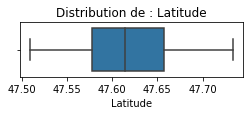

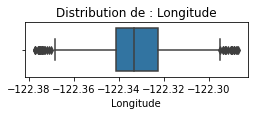

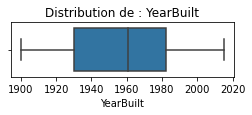

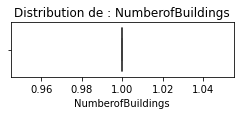

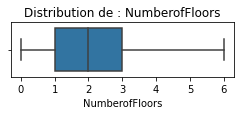

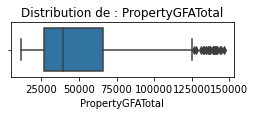

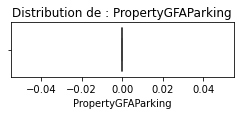

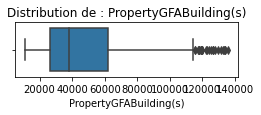

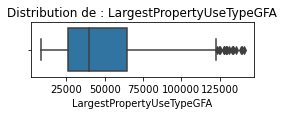

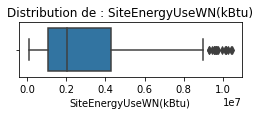

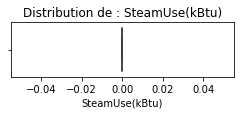

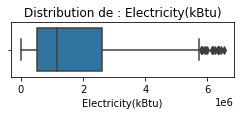

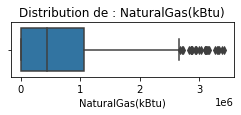

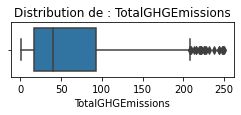

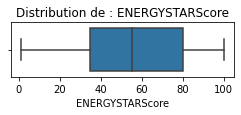

In [54]:
for col in data.select_dtypes("number"):
    plt.figure(figsize = (4,1))
    sns.boxplot(data[col])
    chaine = 'Distribution de : ' + col
    plt.title(chaine)
    plt.show()


**Matrice de corrélation**

In [55]:
print(data)

            BuildingType PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
0         NonResidential               Hotel  47.61220 -122.33799     1927.0   
2         NonResidential               Hotel  47.61393 -122.33810     1969.0   
3         NonResidential               Hotel  47.61412 -122.33664     1926.0   
5     Nonresidential COS               Other  47.61623 -122.33657     1999.0   
6         NonResidential               Hotel  47.61390 -122.33283     1926.0   
...                  ...                 ...       ...        ...        ...   
3362  Nonresidential COS               Other  47.69330 -122.37717     2010.0   
3363  Nonresidential COS               Other  47.72126 -122.29735     1949.0   
3367  Nonresidential COS               Other  47.63228 -122.31574     1912.0   
3370  Nonresidential COS               Other  47.54067 -122.37441     1982.0   
3372  Nonresidential COS               Other  47.59625 -122.32283     2004.0   

      NumberofBuildings  NumberofFloors

<AxesSubplot:>

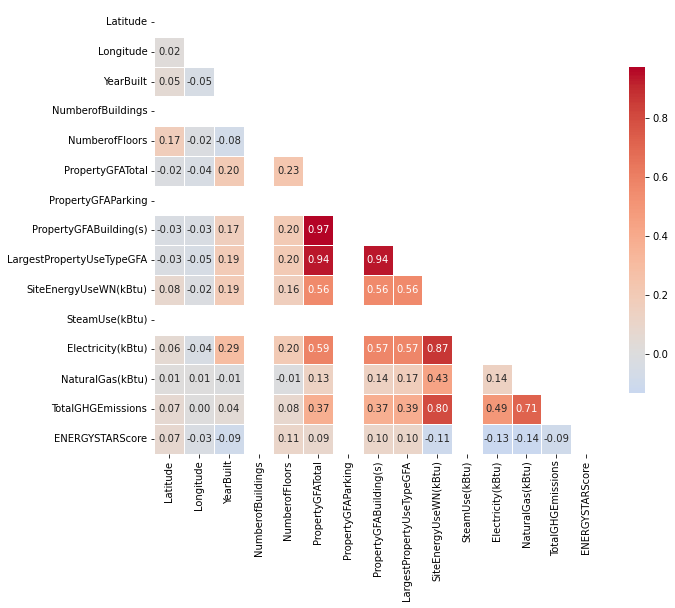

In [56]:
corr = data.corr()
# On affiche que le triangle du bas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm",annot= True, fmt = ".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Observations**

Corrélation importante entre : PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
    
Corrélation importante entre : PropertyGBABuilding(s) et LargestPropertyUseTypeGFA

Corrélation importante entre: TotalGHEmissions et SiteEnergyUseWN(kBtu) (on notera que ce sont les deux variables qu'on cherche à prédire, ce qui laisse présager)

# Création de variables

**Convertir la colonne "SiteEnergyUseWN(kBtu)" en variable catégiriale**

In [57]:
# Sélectionner la colonne "SiteEnergyUseWN(kBtu)"
column_name = "SiteEnergyUseWN(kBtu)"
column_data = data[column_name]

# Calculer les quartiles
quartiles = np.percentile(column_data, np.arange(0, 101, 10))

# Diviser la colonne en quartiles
bins = quartiles
labels = [f"Q{i+1}" for i in range(len(quartiles)-1)]
data[column_name+"_quartiles"] = pd.cut(column_data, bins=bins, labels=labels)

# Afficher le résultat
data.head(6)

,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ENERGYSTARScore,SiteEnergyUseWN(kBtu)_quartiles
0,NonResidential,Hotel,47.61220,-122.33799,1927.0,1.0,1.0,88434.0,0.0,88434.0,Hotel,88434.0,7456910.00,0.0,3946027.0,1276453.0,159.494,60.0,Q10
2,NonResidential,Hotel,47.61393,-122.33810,1969.0,1.0,2.2,58895.0,0.0,58895.0,Hotel,57283.0,8081548.90,0.0,2858492.4,1493800.0,220.986,43.0,Q10
3,NonResidential,Hotel,47.61412,-122.33664,1926.0,1.0,1.0,61320.0,0.0,61320.0,Hotel,61320.0,6946800.50,0.0,2768924.0,1811213.0,220.246,56.0,Q9
5,Nonresidential COS,Other,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,0.0,60090.0,Police Station,88830.0,5869715.85,0.0,4773923.2,719874.4,85.558,75.0,Q9
6,NonResidential,Hotel,47.61390,-122.33283,1926.0,1.0,1.0,83008.0,0.0,83008.0,Hotel,81352.0,6062767.50,0.0,2811215.0,2947580.0,176.140,27.0,Q9
7,NonResidential,Other,47.61327,-122.33136,1926.0,1.0,1.0,102761.0,0.0,102761.0,Other - Entertainment/Public Assembly,102761.0,7067881.50,0.0,3636655.0,385189.0,221.510,34.6,Q9


**Convertir la colonne "TotalGHGEmissions" en variable catégoriale**

In [58]:
# Sélectionner la colonne "SiteEnergyUseWN(kBtu)"
column_name = "TotalGHGEmissions"
column_data = data[column_name]

# Calculer les quartiles
quartiles = np.percentile(column_data, np.arange(0, 101, 10))

# Diviser la colonne en quartiles
bins = quartiles
labels = [f"Q{i+1}" for i in range(len(quartiles)-1)]
data[column_name+"_quartiles"] = pd.cut(column_data, bins=bins, labels=labels)

# Afficher le résultat
data.head(6)

,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ENERGYSTARScore,SiteEnergyUseWN(kBtu)_quartiles,TotalGHGEmissions_quartiles
0,NonResidential,Hotel,47.61220,-122.33799,1927.0,1.0,1.0,88434.0,0.0,88434.0,Hotel,88434.0,7456910.00,0.0,3946027.0,1276453.0,159.494,60.0,Q10,Q9
2,NonResidential,Hotel,47.61393,-122.33810,1969.0,1.0,2.2,58895.0,0.0,58895.0,Hotel,57283.0,8081548.90,0.0,2858492.4,1493800.0,220.986,43.0,Q10,Q10
3,NonResidential,Hotel,47.61412,-122.33664,1926.0,1.0,1.0,61320.0,0.0,61320.0,Hotel,61320.0,6946800.50,0.0,2768924.0,1811213.0,220.246,56.0,Q9,Q10
5,Nonresidential COS,Other,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,0.0,60090.0,Police Station,88830.0,5869715.85,0.0,4773923.2,719874.4,85.558,75.0,Q9,Q8
6,NonResidential,Hotel,47.61390,-122.33283,1926.0,1.0,1.0,83008.0,0.0,83008.0,Hotel,81352.0,6062767.50,0.0,2811215.0,2947580.0,176.140,27.0,Q9,Q10
7,NonResidential,Other,47.61327,-122.33136,1926.0,1.0,1.0,102761.0,0.0,102761.0,Other - Entertainment/Public Assembly,102761.0,7067881.50,0.0,3636655.0,385189.0,221.510,34.6,Q9,Q10


In [59]:
data['SiteEnergyUseWN(kBtu)_quartiles'].isna().sum()

1

In [60]:
data['TotalGHGEmissions_quartiles'].isna().sum()

1

In [61]:
data = data.dropna(subset=["SiteEnergyUseWN(kBtu)_quartiles"])
data = data.dropna(subset=["TotalGHGEmissions_quartiles"])

In [62]:
data['SiteEnergyUseWN(kBtu)_quartiles'].isna().sum()

data['TotalGHGEmissions_quartiles'].isna().sum()

0

**Convertir la colonne 'YearBuilt' en variable catégiriale**

In [63]:
data['YearBuilt'] = data['YearBuilt'].astype(int)

In [64]:
def classify_by_period(data, col_name):
    data['periode'] = pd.cut(data[col_name], 
                            bins=range(1900, data[col_name].max()+22, 20), 
                            labels=[str(year)+"-"+str(year+19) for year in range(1900, data[col_name].max()+2, 20)], 
                            include_lowest=True)
    return data['periode']

data['periode'] = data.YearBuilt.apply(lambda x: classify_by_period(pd.DataFrame({'YearBuilt': [x]}), 'YearBuilt'))


In [65]:
print(data['periode'].unique())

['1920-1939' '1960-1979' '1980-1999' '1900-1919' '2000-2019' '1940-1959']


Supprimer la colonne YearBuilt

In [66]:
data = data.drop('YearBuilt', axis=1)

**Convertir les valeur des variables(Electricity(kBtu),SteamUse(kBtu)et NaturalGas(kBtu)) en un ou zéro**

**Rappel de consigne**

La prédiction se basera sur les données déclaratives du permis d'exploitation commerciale. Sur le permis nous avons le type d'énergie utilisé mais pas la consommation. Déffinissons donc l'usage de chaque type d'énergie par 1 s'il est utilisé et 0 sinon.

In [67]:
def binarise_columns(data, col):
    idx = np.where(data[col] > 0)
    data[col].iloc[idx] = 1
    
    idx_0 = np.where(data[col] == 0)
    data[col].iloc[idx_0] = 0
    return data

for cols in ["Electricity(kBtu)","SteamUse(kBtu)", "NaturalGas(kBtu)"] :
    data = binarise_columns(data,cols)

In [68]:
data[["Electricity(kBtu)","SteamUse(kBtu)", "NaturalGas(kBtu)"]]

,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu)
0,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
5,1.0,0.0,1.0
6,1.0,0.0,1.0
...,...,...,...
3362,1.0,0.0,1.0
3363,1.0,0.0,1.0
3367,1.0,0.0,1.0
3370,1.0,0.0,1.0


In [69]:
print("shape after: ", data.shape)

shape after:  (656, 20)


# Analyse des Target

In [70]:
descriptives_stat(data,["TotalGHGEmissions","SiteEnergyUseWN(kBtu)"])

Desc,TotalGHGEmissions,SiteEnergyUseWN(kBtu)
count,656.000000,656.000000
moyenne,62.997652,3021779.504115
écart-type,60.594514,2577064.161810
médiane,40.015000,2046035.875000
min,0.750000,109471.796900
variance,3671.695175,6641259694086.098633
skewness : mesure d'asymétrie,1.211549,1.143382
kurtosis: mesure d'aplatissement,0.585207,0.246713
mode,145.796000,5869715.850000
max,249.460000,10443463.000000


# Exportation pour modélisation

In [71]:
data.reset_index(drop = True, inplace =True)

In [72]:
data.to_csv("building_energy_cleaned.csv")

In [73]:
data

,BuildingType,PrimaryPropertyType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ENERGYSTARScore,SiteEnergyUseWN(kBtu)_quartiles,TotalGHGEmissions_quartiles,periode
0,NonResidential,Hotel,47.61220,-122.33799,1.0,1.0,88434.0,0.0,88434.0,Hotel,88434.0,7.456910e+06,0.0,1.0,1.0,159.494,60.0,Q10,Q9,1920-1939
1,NonResidential,Hotel,47.61393,-122.33810,1.0,2.2,58895.0,0.0,58895.0,Hotel,57283.0,8.081549e+06,0.0,1.0,1.0,220.986,43.0,Q10,Q10,1960-1979
2,NonResidential,Hotel,47.61412,-122.33664,1.0,1.0,61320.0,0.0,61320.0,Hotel,61320.0,6.946800e+06,0.0,1.0,1.0,220.246,56.0,Q9,Q10,1920-1939
3,Nonresidential COS,Other,47.61623,-122.33657,1.0,2.0,97288.0,0.0,60090.0,Police Station,88830.0,5.869716e+06,0.0,1.0,1.0,85.558,75.0,Q9,Q8,1980-1999
4,NonResidential,Hotel,47.61390,-122.33283,1.0,1.0,83008.0,0.0,83008.0,Hotel,81352.0,6.062768e+06,0.0,1.0,1.0,176.140,27.0,Q9,Q10,1920-1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Nonresidential COS,Other,47.69330,-122.37717,1.0,1.0,11968.0,0.0,11968.0,Prison/Incarceration,11968.0,8.587730e+05,0.0,1.0,1.0,23.000,43.4,Q2,Q4,2000-2019
652,Nonresidential COS,Other,47.72126,-122.29735,1.0,1.0,11285.0,0.0,11285.0,Prison/Incarceration,11285.0,7.059837e+05,0.0,1.0,1.0,14.370,34.6,Q2,Q3,1940-1959
653,Nonresidential COS,Other,47.63228,-122.31574,1.0,1.0,23445.0,0.0,23445.0,Other - Recreation,23445.0,6.716330e+06,0.0,1.0,1.0,153.380,68.0,Q9,Q9,1900-1919
654,Nonresidential COS,Other,47.54067,-122.37441,1.0,1.0,18261.0,0.0,18261.0,Other - Recreation,18261.0,1.025432e+06,0.0,1.0,1.0,20.330,36.4,Q3,Q3,1980-1999


GHG: greenhouse gas emissions, correspond aux émissions des gazs à effets de serre.

OSE: Seattle Office of Sustainability and Environment.
EUI: Energy Use Intensity.
kBtu: kilo-British thermal unit, 1 kWh = 3.412 kBtu.
sf: square feet, 1m² = 10,7639sf.
WN: weather-normalized, normalisé vis à vis des conditions climatiques.

GFA: Gross floor area, Surface de plancher brute - La surface de plancher couverte (par un toit, même sans mur) totale contenue dans le bâtiment.

therm: mesure énergétique 1thm =100000Btu.